In [ ]:
# import necessary libraries/modules
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
# generate sample graph
G = nx.karate_club_graph()

In [ ]:
# create function that selects a random edge for use in edge_exchange
def get_random_edge(G):
    '''
    selects one edge at random from graph G and returns its two nodes

    Args:
        G (nx.Graph): the graph to be referenced

    Returns:
        list: a list of the two nodes from selected edge
    '''
    edges = list(G.edges())

    random_edge = random.choice(edges)

    return list(random_edge)

In [ ]:
# translate provided pseudocode function
def edge_exchange(G, t):
        '''
        Implements 'edge exchange' algorithm to generate a null model of a graph while preserving its initial 
        degree distribution. Performs 't' successful edge exchanges on given graph 'G' to randomize it.

        Args:
            G (nx.Graph): an undirected graph
            t (int): number of exchanges to be performed.

        Returns:
            nx.Graph: a new, randomized version of input graph G.
        '''
        G_copy = G.copy()  # create a copy of the graph so as to avoid altering it in place

        s = 0  # initialize counter

        while s < t:
            node_a, node_b = get_random_edge(G_copy)
            # define nodes to be referenced
            node_c, node_d = get_random_edge(G_copy)
            if node_a == node_c or node_a == node_d or node_b == node_c or node_b == node_d:
                continue  # skip if edges not independent
            if G_copy.has_edge(node_a, node_d) or G_copy.has_edge(node_b, node_c):
                continue  # skip if edges to be created already exist
            G_copy.remove_edge(node_a, node_b)
            G_copy.remove_edge(node_c, node_d)
            G_copy.add_edge(node_a, node_d)
            G_copy.add_edge(node_b, node_c)  # remove and replace edges

            s += 1  # add 1 to counter

        return G_copy

In [ ]:
# 2b
def edge_exchange(G, t, max):
    '''
    Implements 'edge exchange' algorithm to generate a null model of a graph while preserving its initial 
    degree distribution. Performs 't' successful edge exchanges on given graph 'G' to randomize it.

    Args:
        G (nx.Graph): an undirected graph
        t (int): number of exchanges to be performed.
        max (int): maximum number of failed iterations before loop closes

    Returns:
        nx.Graph: a new, randomized version of input graph G.
    '''
    G_copy = G.copy()  # create a copy of the graph so as to avoid altering it in place

    s = 0  # initialize counter for successful swaps
    itercount = 0  # initialize counter for failed iterations

    while s < t and itercount < max:
        node_a, node_b = get_random_edge(G_copy)
        # define nodes to be referenced
        node_c, node_d = get_random_edge(G_copy)
        if node_a == node_c or node_a == node_d or node_b == node_c or node_b == node_d:
            itercount += 1  # add 1 to failure counter
            continue  # skip if edges not independent
        if G_copy.has_edge(node_a, node_d) or G_copy.has_edge(node_b, node_c):
            itercount += 1
            continue  # skip if edges to be created already exist
        G_copy.remove_edge(node_a, node_b)
        G_copy.remove_edge(node_c, node_d)
        G_copy.add_edge(node_a, node_d)
        G_copy.add_edge(node_b, node_c)  # remove and replace edges

        s += 1  # add 1 to success counter

    if itercount == max:  # print error message if max failures reached
        print("Error: Insufficient number of allowable exchanges")
        return None # differentiate between outputs if loop fails

    return G_copy

In [ ]:
G_complete = nx.complete_graph(100) # creating a complete graph to test functionality of 2b answer

In [ ]:
# testing the function

# call function and assign it to a variable
G_null = edge_exchange(G_complete, 200, 1000)

# print side by side comp if it works
if G_null is not None:

    fig, ax = plt.subplots(nrows=1, ncols=2)

    ax[0].set_title("original network")

    nx.draw(G_complete, ax=ax[0], with_labels=True, node_color='#1f78b4')

    ax[1].set_title("randomized network")

    nx.draw(G_null, ax=ax[1], with_labels=True, node_color='#ff7f0e')

    plt.show()

Error: Insufficient number of allowable exchanges


In [ ]:
# 2c
def edge_exchange(G, t, max):
    '''
    Implements 'edge exchange' algorithm to generate a null model of a graph while preserving its initial 
    degree distribution. Performs 't' successful edge exchanges on given graph 'G' to randomize it.

    Args:
        G (nx.Graph): an undirected graph
        t (int): number of exchanges to be performed.
        max (int): maximum number of failed iterations before loop closes

    Returns:
        nx.Graph: a new, randomized version of input graph G.
    '''
    # create a copy of the graph so as to avoid altering it in place
    G_copy = G.copy()

    # initialize counter for successful swaps
    s = 0
    # initialize counter for failed iterations
    itercount = 0

    # assign error message to variable
    errmsg = "Error: Insufficient number of allowable exchanges"

    # check if graph is connected
    if nx.is_connected(G):

        while s < t and itercount < max:
            node_a, node_b = get_random_edge(G_copy)
            # define nodes to be referenced
            node_c, node_d = get_random_edge(G_copy)
            if node_a == node_c or node_a == node_d or node_b == node_c or node_b == node_d:
                itercount += 1  # add 1 to failure counter
                continue  # skip if edges not independent
            if G_copy.has_edge(node_a, node_d) or G_copy.has_edge(node_b, node_c):
                itercount += 1
                continue  # skip if edges to be created already exist
            G_copy.remove_edge(node_a, node_b)
            G_copy.remove_edge(node_c, node_d)
            G_copy.add_edge(node_a, node_d)
            G_copy.add_edge(node_b, node_c)  # remove and replace edges

            s += 1  # add 1 to success counter
    else:
        # divide graph into subgraphs and assign them to a list
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        # initialize list for randomized components
        randomized_components = []
        # perform edge exchange on each element in list of initial components
        for c in components:
            rc = edge_exchange(c, t, max)
            if rc is not None: # check that max was not reached and append subgraph to list if so
                randomized_components.append(rc)
            else: # display error message if max is reached
                print(errmsg)
                return None

        G_copy = nx.union_all(randomized_components) # recombine subgraphs

    if itercount == max:  # print error message if max failures reached
        print(errmsg)
        return None  # differentiate between outputs if loop fails

    return G_copy

In [ ]:
# 2d
def edge_exchange(G, t, max):
    '''
    Implements 'edge exchange' algorithm to generate a null model of a graph while preserving its initial 
    degree distribution. Performs 't' successful edge exchanges on given graph 'G' to randomize it.

    Args:
        G (nx.Graph): an undirected graph
        t (int): number of exchanges to be performed.
        max (int): maximum number of failed iterations before loop closes

    Returns:
        nx.Graph: a new, randomized version of input graph G.
    '''
    # create a copy of the graph so as to avoid altering it in place
    G_copy = G.copy()

    # initialize counter for successful swaps
    s = 0
    # initialize counter for failed iterations
    itercount = 0

    # assign error message to variable
    errmsg = "Error: Insufficient number of allowable exchanges"

    # check if graph is connected
    if nx.is_connected(G):
    # if yes then initiate while loop
        while s < t and itercount < max:
            # define nodes to be referenced
            node_a, node_b = get_random_edge(G_copy)
            node_c, node_d = get_random_edge(G_copy)
            # check if attribute correlation holds for first valid case
            if G_copy.nodes[node_a] == G_copy.nodes[node_c] and G_copy.nodes[node_b] == G_copy.nodes[node_d]:
                if node_a == node_c or node_a == node_d or node_b == node_c or node_b == node_d:
                    itercount += 1  # add 1 to failure counter
                    continue  # skip if edges not independent
                if G_copy.has_edge(node_a, node_d) or G_copy.has_edge(node_b, node_c):
                    itercount += 1
                    continue  # skip if edges to be created already exist
                # check if attribute correlation is preserved and skip if not
                # remove and replace edges
                G_copy.remove_edge(node_a, node_b)
                G_copy.remove_edge(node_c, node_d)
                G_copy.add_edge(node_a, node_d)
                G_copy.add_edge(node_b, node_c)
                s += 1  # add 1 to success counter
            # check if attribute correlation holds for second valid case
            elif G_copy.nodes[node_a] == G_copy.nodes[node_d] and G_copy.nodes[node_b] == G_copy.nodes[node_c]:
                # repeat process with new created edges
                if node_a == node_c or node_a == node_d or node_b == node_c or node_b == node_d:
                    itercount += 1
                    continue
                if G_copy.has_edge(node_a, node_c) or G_copy.has_edge(node_b, node_d):
                    itercount += 1
                    continue
                G_copy.remove_edge(node_a, node_b)
                G_copy.remove_edge(node_c, node_d)
                G_copy.add_edge(node_a, node_c)
                G_copy.add_edge(node_b, node_d)
                s += 1
            else:
                continue
    else:
        # if disconnected then divide graph into subgraphs and assign them to a list
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        # initialize list for randomized components
        randomized_components = []
        # perform edge exchange on each element in list of initial components
        for c in components:
            rc = edge_exchange(c, t, max)
            if rc is not None: # check that max was not reached and append subgraph to list if so
                randomized_components.append(rc)
            else: # display error message if max is reached
                print(errmsg)
                return None

        G_copy = nx.union_all(randomized_components) # recombine subgraphs

    if itercount == max:  # print error message if max failures reached
        print(errmsg)
        return None  # differentiate between outputs if loop fails

    return G_copy

In [ ]:
# test by creating new random graph and endowing all nodes with binary attribute
#G_binary = nx.erdos_renyi_graph(100, 0.4)
G_binary = nx.karate_club_graph()

# store node dict in variable
nodes = G_binary.nodes()

# iterate through nodes
for i in nodes:
    if i % 2 == 0:
        # assign to blue group if even
        nodes[i]['group'] = 'Blue'
    else:
        # assign to red group if odd
        nodes[i]['group'] = 'Red'

G_null = edge_exchange(G_binary, 200, 100000)

# visualize result
if G_null is not None:
    # create list of colors based on attribute
    color_map = ['blue' if G_binary.nodes[node]['group'] == 'Blue' else 'red' 
                 for node in G_binary.nodes()]
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    ax[0].set_title("Original Network")

    pos = nx.spring_layout(G_binary, seed=42)
    nx.draw(G_binary, pos, ax=ax[0], with_labels=True, node_color=color_map)

    ax[1].set_title("Randomized Network")

    nx.draw(G_null, pos, ax=ax[1], with_labels=True, node_color=color_map)

    plt.show()

def count_attribute_edges(graph):
    """Counts the number of edge types based on the 'group' node attribute."""
    # Initialize a dictionary to hold the counts
    counts = {'Blue-Blue': 0, 'Red-Red': 0, 'Blue-Red': 0}
    
    # Loop through every edge in the graph
    for u, v in graph.edges():
        group_u = graph.nodes[u]['group']
        group_v = graph.nodes[v]['group']
        
        # Increment the correct counter
        if group_u == 'Blue' and group_v == 'Blue':
            counts['Blue-Blue'] += 1
        elif group_u == 'Red' and group_v == 'Red':
            counts['Red-Red'] += 1
        else:  # This covers both ('Blue', 'Red') and ('Red', 'Blue')
            counts['Blue-Red'] += 1
            
    return counts

# --- Run the quantitative check ---
original_counts = count_attribute_edges(G_binary)
null_counts = count_attribute_edges(G_null)

print("\n--- Edge Type Counts ---")
print(f"Original Graph: {original_counts}")
print(f"Null Model:     {null_counts}")

# Compare the two dictionaries of counts
if original_counts == null_counts:
    print("\n✅ Success! The edge type counts are identical. The function worked correctly.")
else:
    print("\n❌ Failure! The edge type counts are different. There is a bug in the function.")

In [ ]:
# 3a
def harmonic_centrality(G, k):
    ''' 
    From graph G, computes harmonic centrality metric of node k

    Args:
        G (nx.Graph): network to be referenced
        k (G.node): node to be referenced
    
    Returns:
        int: harmonic centrality of node k
    '''
    lengths_r = []
    nodes = G.nodes()
    for node in nodes:
        if node != k:
            lengths_r.append(1/(nx.shortest_path_length(G, source=k, target=node)))

    return sum(lengths_r)

In [ ]:
# 3b
def harmonic_centrality(G, k):
    ''' 
    From graph G, computes harmonic centrality metric of node k

    Args:
        G (nx.Graph): network to be referenced
        k (G.node): node to be referenced
    
    Returns:
        int: harmonic centrality of node k
    '''
    if k not in G:
        print("Error: Node does not exist or is not present in graph")
        return None
    if isinstance(G, nx.Graph) == False:
        print("Error: Graph is not a NetworkX object")
        return None

    
    dist_rec = []
    nodes = G.nodes()
    for node in nodes:
        if node != k:
            try:
                dist_rec.append(1/(nx.shortest_path_length(G, source=k, target=node)))
            except nx.NetworkXNoPath:
                pass

    return sum(dist_rec)

In [ ]:
# 3c

# creating disconnected graph
G_disconnected = nx.Graph()
G_disconnected.add_edges_from([(0, 1), (1, 2)])  # component 1
G_disconnected.add_node(3)  # component 2 (isolated node)
# testing disconnected graph
hc = harmonic_centrality(G_disconnected, 0)
print(f"for disconnected graph:")
print(f"my function: {hc}")
print(f"nx function: {nx.harmonic_centrality(G_disconnected, 0)}")

# blank line for spacing
print()

# quick function to get a random node
def random_node(G):
    ''' 
    selects a random node from graph G
    '''
    return random.choice(list(G.nodes()))

# creating fully connected graph
G_complete = nx.complete_graph(50)
# select random node as 2nd arg
hc = harmonic_centrality(G_complete, random_node(G_complete))
print(f"for complete graph:")
print(f"my function: {hc}")
print(f"nx function: {nx.harmonic_centrality(G_complete, random_node(G_complete))}")
print()

# creating scale free network
G_scalefree = nx.generators.barabasi_albert_graph(50, 3)
# making sure the same node is passed into both functions
selectednode = random_node(G_scalefree)
hc = harmonic_centrality(G_scalefree, selectednode)
print(f"for scale free graph:")
print(f"my function: {hc}")
print(f"nx function: {nx.harmonic_centrality(G_scalefree, selectednode)}")

In [ ]:
# 3d

import math # importing math module for use in function

def centrality_function_tester(user_func, nx_func):
    ''' 
    When given a function which is intended to calculate a centrality metric, tests
    it by exposing it to a variety of edge cases and comparing its output with its
    corresponding in-built NetworkX function. User function must return single int.

    Args:
        user_func (function): user's function
        nx_func (NetworkX function)
    
    Returns:
        str: message declaring results of test
    '''
    # init list of failures to potentially be appended later
    failures = []

    # testing normal graph (erdos renyi)
    G = nx.erdos_renyi_graph(50, 0.5)
    k = random_node(G)
    user_output = user_func(G, k)
    nx_output = nx_func(G, k)
    # using math.isclose function to account for negligible differences
    if not math.isclose(user_output, nx_output[k]):
        failures.append('Basic functionality')
    else:
        pass

    # testing disconnected graph
    G = nx.Graph()
    G.add_edges_from([(0, 1), (1, 2)])
    G.add_node(3)
    k = 0
    user_output = user_func(G, k)
    nx_output = nx_func(G, k)
    if not math.isclose(user_output, nx_output[k]):
        failures.append('Disconnected graph')
    else:
        pass

    # testing complete graph
    G = nx.complete_graph(50)
    k = random_node(G)
    user_output = user_func(G, k)
    nx_output = nx_func(G, k)
    if not math.isclose(user_output, nx_output[k]):
        failures.append('Complete graph')
    else:
        pass

    # testing non-networkx graph input
    try:
        user_output = user_func(12, 0)
        if user_output is not None:
            failures.append('Non-NetworkX graph input (did not return None)')
    except:
        failures.append('Non-NetworkX graph input (crashed)')

    # testing empty graph
    try:
        user_output = user_func(nx.empty_graph(), 0)
        if user_output is not None:
            failures.append('Empty graph (did not return None)')
    except:
        failures.append('Empty graph (crashed)')

    # testing graph with no edges
    G = nx.empty_graph(50)
    k = random_node(G)
    user_output = user_func(G, k)
    nx_output = nx_func(G, k)
    if not math.isclose(user_output, nx_output[k]):
        failures.append('Edgeless graph')
    else:
        pass

    # testing node not in G
    try:
        user_output = user_func(nx.path_graph(5), 50)
        if user_output is not None:
            failures.append('Node not in graph (did not return None)')
    except:
        failures.append('Node not in graph (crashed)')

    # check if there were any failures and return result based on that
    if not failures:
        return "All scenarios passed. Test successful."
    else:
        return f"Test failed at edge case(s): {[failures]} "

In [134]:
# 4b

# opening dataset
path = open(r'c:\Users\User\Documents\network datasets\norway-bod\net2m_2008-06-01.gml', 'r', encoding='utf-8')
# using open() and parse_gml to account for gml file being encoded in utf-8 despite 
# read_gml being hardcoded to read ascii
dataset = nx.parse_gml(path,label='id')

# using list comprehension to extract only degrees for input into null model
deg_seq = [degree for node, degree in dataset.degree()]
# generatiing null model
dataset_null = nx.configuration_model(deg_seq)
# deleting self loops and multiedges
dataset_null.remove_edges_from(nx.selfloop_edges(dataset_null))
dataset_null = nx.Graph(dataset_null)

# calculating degree for each node
degrees_og = list(dict(dataset.degree()).values())
# harmonic centrality (wanted to use my own function for fun but had to make it a 
# loop since it doesn't output a dict)
hclist_og = []
for node in dataset.nodes():
    hclist_og.append(harmonic_centrality(dataset, node))
# clustering coefficient
cclist_og = list(nx.clustering(dataset).values())

# same process for null model
degrees_null = list(dict(dataset_null.degree()).values())
hclist_null = []
for node in dataset_null.nodes():
    hclist_null.append(harmonic_centrality(dataset_null, node))
cclist_null = list(nx.clustering(dataset_null).values())

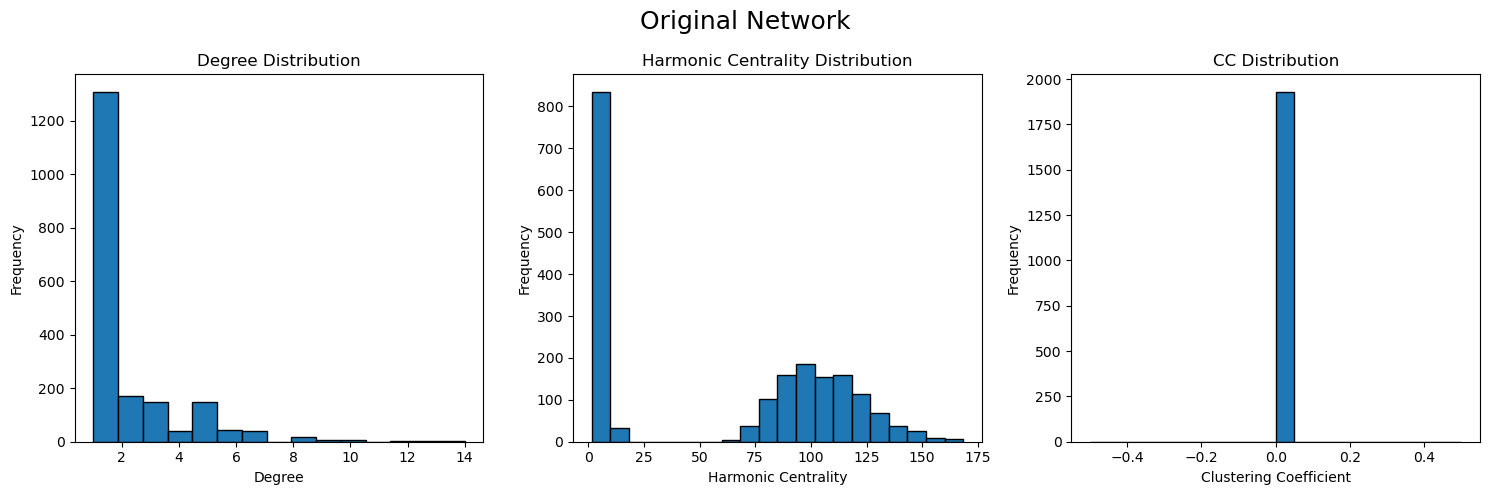

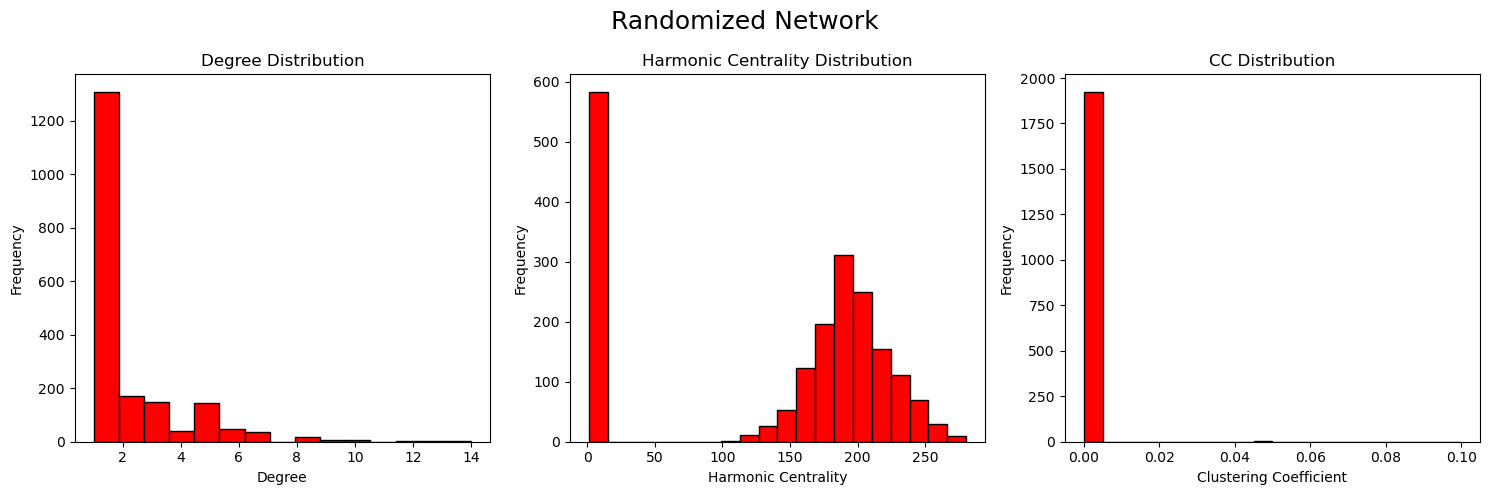

In [151]:
# 4b cont

# i ---

# creating figure and subplots
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(15, 5))
# creating plots
ax[0].hist(degrees_og, bins=15, edgecolor='black')
ax[1].hist(hclist_og, bins=20, edgecolor='black')
ax[2].hist(cclist_og, bins=20, edgecolor='black')
# adding titles and labels
fig.suptitle("Original Network", fontsize=18)
ax[0].set_title("Degree Distribution")
ax[0].set_xlabel("Degree")
ax[0].set_ylabel("Frequency")
ax[1].set_title("Harmonic Centrality Distribution")
ax[1].set_xlabel("Harmonic Centrality")
ax[1].set_ylabel("Frequency")
ax[2].set_title("CC Distribution")
ax[2].set_xlabel("Clustering Coefficient")
ax[2].set_ylabel("Frequency")
plt.tight_layout()

# ii ---

fignull, axnull = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
# plots (changed color for distinction)
axnull[0].hist(degrees_null, bins=15, edgecolor='black', color='red')
axnull[1].hist(hclist_null, bins=20, edgecolor='black', color='red')
axnull[2].hist(cclist_null, bins=20, edgecolor='black', color='red')
# titles and labels
fignull.suptitle("Randomized Network", fontsize=18)
axnull[0].set_title("Degree Distribution")
axnull[0].set_xlabel("Degree")
axnull[0].set_ylabel("Frequency")
axnull[1].set_title("Harmonic Centrality Distribution")
axnull[1].set_xlabel("Harmonic Centrality")
axnull[1].set_ylabel("Frequency")
axnull[2].set_title("CC Distribution")
axnull[2].set_xlabel("Clustering Coefficient")
axnull[2].set_ylabel("Frequency")
plt.tight_layout()

plt.show()